# Experimental Methodology in Natural Language Processing


## Objectives

- Understanding 
    - the role and types of evaluation in NLP/ML
    - the lower and upper bounds of performance
    - correct usage of data for experimentation
    - evaluation metrics
    
- Learning how to use `scikit-learn` to perform a text classification experiment
    - provided baselines
    - text vectorization
    - evaluation methods

### Requirements
- [scikit-learn](https://scikit-learn.org/)
    - run `pip install scikit-learn`

## 1. Basic Concepts of Experimental Method

### 1.1. Lower & Upper Bounds of the Performance

#### Lower Bound: Baseline
Trivial solution to the problem: 

- _random_: random decision
- _chance_: random decision w.r.t. the distribution of categories in the training data
- _majority_: assign everything to the largest category etc.
- or the *state-of-the-art* model that you want to beat

#### Upper Bound: Inter-rater agreement
Usually human performance.

A system is expected to perform within the lower and upper bounds.
            

### 1.2. Data Split

#### 1.2.1. Training-Testing Split

Often Data Set is split into the following parts:

- _Training_: for training / extracting rules / etc.
- _Development_ (Validation, or simply Dev): for optimization / intermediate evaluation
- _Testing_: for the final evaluation 

#### 1.2.1. [K-Fold Cross-Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))
In k-fold cross-validation, the original sample is randomly partitioned into $k$ equal sized subsamples. Of the $k$ subsamples, a single subsample is retained as the validation data for testing the model, and the remaining $k − 1$ subsamples are used as training data. The cross-validation process is then repeated $k$ times, with each of the $k$ subsamples used exactly once as the validation data. The $k$ results can then be averaged to produce a single estimation.

\*
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png " alt="kfold" width="500"/>

\*Image from https://scikit-learn.org/stable/modules/cross_validation.html

- Random K-Fold Cross-Validation splits data into $K$ equal folds
- Stratified K-Fold Cross-Validation additionally makes sure that the distribution of target labels is similar across different folds

The general procedure is as follows:

- Shuffle the dataset randomly
- Split the dataset into $k$ folds
- For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
- Summarize the model performance averaging the evaluation scores

## 2. Evaluation Metrics

### 2.1. Contingency Table

A [contingency table](https://en.wikipedia.org/wiki/Contingency_table) (also known as a _cross tabulation_ or _crosstab_) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables. For the binary classification into positive (_POS_) and negative (_NEG_) classes, the predictions of a model (_HYP_, for hypotheses) with respect to the true labels (_REF_, for referencens) can be represented as the  matrix.

|     |         | REF     |         |
|-----|---------|:-------:|:-------:|
|     |         | __POS__ | __NEG__ |
| HYP | __POS__ | TP      | FP      |
|     | __NEG__ | FN      | TN      |


Where:
- __TP__: True Positives (usually denoted as $a$)
- __FP__: False Positivea ($b$)
- __FN__: False Negatives ($c$)
- __TN__: True Negatives ($d$)

### 2.1. The Simplest Case: Accuracy

$$ \text{Accuracy} = \frac{\text{Num. of Correct Decisions}}{\text{Total Num. of Instances}} $$

- Known number of instances
- Single decision for each instance 
- Single correct answer for each instance 
- All errors are equal

$$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}}$$

__What if TN is infinite or unknown?__

e.g.: Number of irrelevant queries to a search engine

### 2.2. Precision & Recall

|     |         | REF     |         |             |
|-----|---------|:-------:|:-------:|-------------|
|     |         | __POS__ | __NEG__ |             |
| HYP | __POS__ | TP      | FP      | _Precision_ |
|     | __NEG__ | FN      | TN      |             |
|     |         | _Recall_ |        |             |


$$ \text{Precison} = \frac{\text{TP}}{\text{TP}+\text{FP}}$$

$$ \text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}}$$

<img src="https://miro.medium.com/max/878/1*Ub0nZTXYT8MxLzrz0P7jPA.png" width="800"/>

__2 Values__: 

Precision-Recall Trade-Off

**Personal notes**
- Precision: of all items declared positive, how many are right?
- Recall: of all possible positive items, how many correctly detected?

### 2.3. F-Measure

- Harmonic Mean of Precision & Recall 
- Usually evenly weighted


$$F_{\beta} = \frac{(1 + \beta^2) ∗ \text{Precision} ∗ \text{Recall}}{\beta^2 ∗ \text{Precision} + \text{Recall}}$$

Most common value of $\beta = 1$

$ F_1 = \frac{2 ∗ \text{Precision} ∗ \text{Recall}}{\text{Precision} + \text{Recall}}$

### 2.4. Micro, Macro and (Macro-) Weighted Averaging

In a Multi-Class setting per-class scores are averaged to produce a single score.
There are several ways the scores could be averaged. 

__Micro Averaging__

We compute scores summing over True Positive, True Negative, False Positive and False Negatives.

__Macro Averaging__

We first compute scores per class, then average the scores ignoring their distribution in the test set.

__(Macro-) Weighted Averaging__

Similar to Macro Averaging, but we additionally weight the scores by the class-frequency.

#### Precision Example

Let's assume we have 3 classes. The precision formula from above is:

$$ \text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}$$

$$\text{Micro Precision} = \frac{\text{TP}_1 + \text{TP}_2 +\text{TP}_3}{(\text{TP}_1 + \text{TP}_2 +\text{TP}_3)+(\text{FP}_1 + \text{FP}_2 +\text{FP}_3)}$$

$$\text{Macro Precision} = \frac{P_1 + P_2 + P_3}{3} = P_1 * \frac{1}{3} + P_2 * \frac{1}{3} + P_3 * \frac{1}{3}$$

$$\text{Weighted Precision} = P_1 * \frac{S_1}{N} + P_2 * \frac{S_2}{N} + P_3 * \frac{S_3}{N}$$

Where:
- $S$ is the support for the class (i.e. number of observations with that labels)
- $N$ is the total number of observations

## 3. Classification with Scikit-Learn

- Loading Data
- Baselines
- Training Classifier
- Evaluation


### 3.1. Loading and Inspecting a Dataset

`scikit-learn` comes with several toy datasets.
Let's use one of those (iris) to perform a simple classification experiment.

Iris dataset: https://archive.ics.uci.edu/ml/datasets/iris 
 - 3 lineraly and not-linearly separable classes
    
The iris dataset is a classic and very easy multi-class classification dataset.

| Property          | Value |
|-------------------|-------|
| Classes           |   3 |
| Samples per class |  50 |
| Samples total     | 150 |
| Dimensionality    |   4 | 
| Features          | real, positive | 

In [1]:
from sklearn.datasets import load_iris
from collections import Counter
data = load_iris()

print("Classes: {}".format(len(list(data.target_names))))
print("Samples: {}".format(len(data.data)))
print("Dimensionality: {}".format(len(list(data.feature_names))))
print("Samples per Class: {}".format(dict(Counter(list(data.target)))))

print(data.data[0])  # prints feature vector

print(data.data.shape)  # prints matrix shape for data
print(data.target.shape)  # print matrix shape for labels

# print(data.DESCR)  # prints full data set description
# print(data.data)  # prints features
# print(data.target) # prints labels

Classes: 3
Samples: 150
Dimensionality: 4
Samples per Class: {0: 50, 1: 50, 2: 50}
[5.1 3.5 1.4 0.2]
(150, 4)
(150,)


### 3.2. Splitting the Dataset

- Random K-Fold Split
- Stratified K-Fold Split

In [2]:
from sklearn.model_selection import KFold
n_split = 5
random_split = KFold(n_splits= n_split, shuffle=True)

# 5 splits, for each train/test (K-1 and Kth folds): 30/150 = 1/5 => K = 5 folds
for train_index, test_index in random_split.split(data.data):
    
    print("Samples per Class in Training: {}".format(dict(Counter(list(data.target[train_index])))))
    print("Samples per Class in Testing: {}\n".format(dict(Counter(list(data.target[test_index])))))
    

Samples per Class in Training: {0: 41, 1: 41, 2: 38}
Samples per Class in Testing: {0: 9, 1: 9, 2: 12}

Samples per Class in Training: {0: 43, 1: 39, 2: 38}
Samples per Class in Testing: {0: 7, 1: 11, 2: 12}

Samples per Class in Training: {0: 39, 1: 42, 2: 39}
Samples per Class in Testing: {0: 11, 1: 8, 2: 11}

Samples per Class in Training: {0: 37, 1: 40, 2: 43}
Samples per Class in Testing: {0: 13, 1: 10, 2: 7}

Samples per Class in Training: {0: 40, 1: 38, 2: 42}
Samples per Class in Testing: {0: 10, 1: 12, 2: 8}



C:\Users\xdieg\AppData\Local\Temp\ipykernel_23956\895836917.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


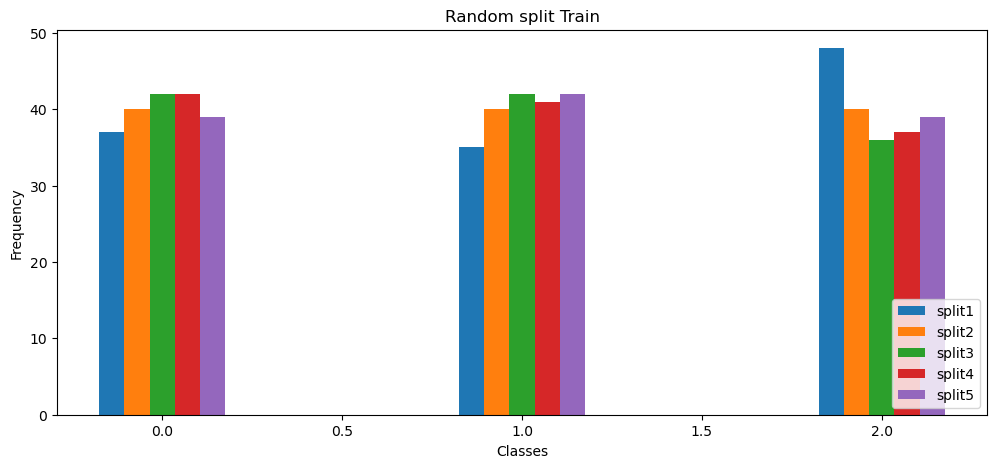

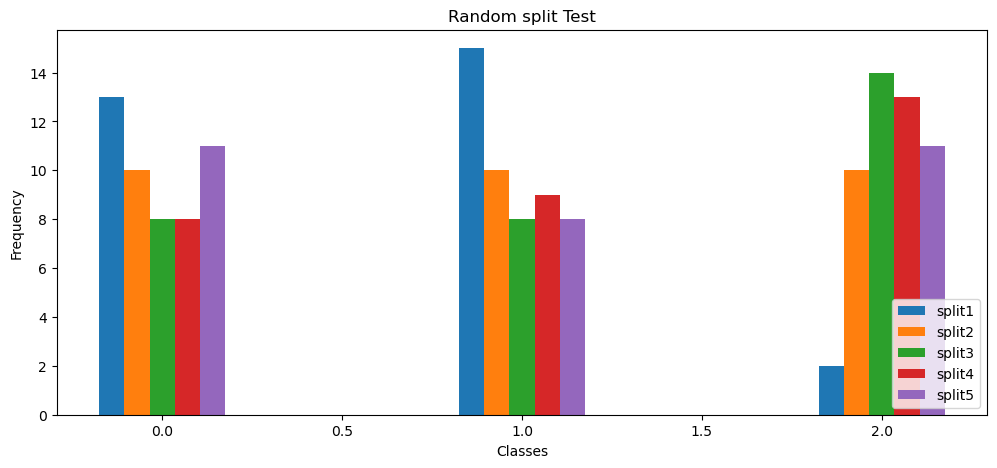

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bars(values, labels, width=0.35, title=""):
    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots(figsize=(12,5))
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Classes')
    ax.set_title(title)
    ax.set_xticks(x, labels)
    
    center = round(len(values)/2)
    for id_x, temp in enumerate(values):
        new_x = x + width/len(values) * (id_x-center)
        lab = 'split'+str(id_x+1)
        ax.bar(new_x, temp, width/len(values), label=lab)

    ax.legend(loc='lower right')
    plt.show()

split_train = []
split_test = []

for train_index, test_index in random_split.split(data.data):    
    # For each split append the target label counts: 0 => x, 1 => y, 2 => z
    split_train.append([ v for _, v in sorted(Counter(list(data.target[train_index])).items())])
    split_test.append([ v for _, v in sorted(Counter(list(data.target[test_index])).items())])


plot_bars(split_train, [0,1,2], title='Random split Train')

plot_bars(split_test, [0,1,2], title='Random split Test')

# Add some text for labels, title and custom x-axis tick labels, etc.



In [4]:
from sklearn.model_selection import StratifiedKFold

# This ensures class balance?
stratified_split = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in stratified_split.split(data.data, data.target):
    
    print("Samples per Class in Training: {}".format(dict(Counter(list(data.target[train_index])))))
    print("Samples per Class in Testing: {}".format(dict(Counter(list(data.target[test_index])))))

Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing: {0: 10, 1: 10, 2: 10}
Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing: {0: 10, 1: 10, 2: 10}
Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing: {0: 10, 1: 10, 2: 10}
Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing: {0: 10, 1: 10, 2: 10}
Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing: {0: 10, 1: 10, 2: 10}


C:\Users\xdieg\AppData\Local\Temp\ipykernel_23956\895836917.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


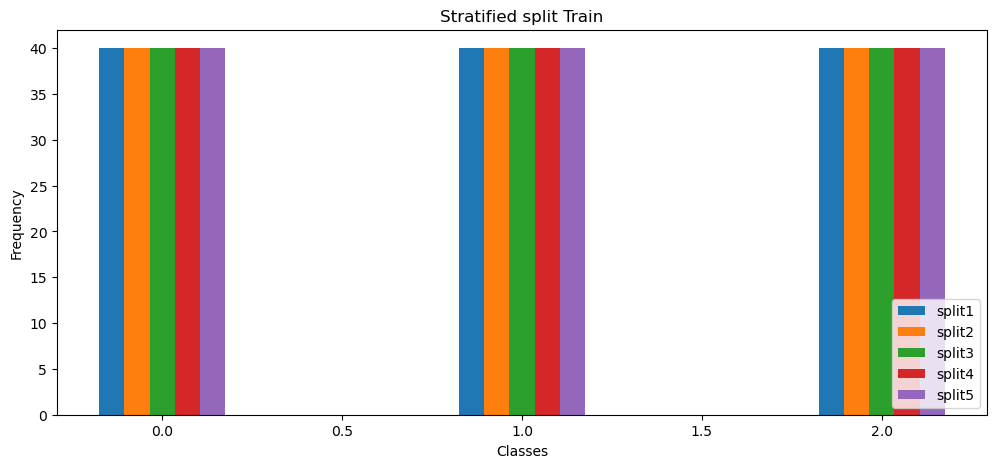

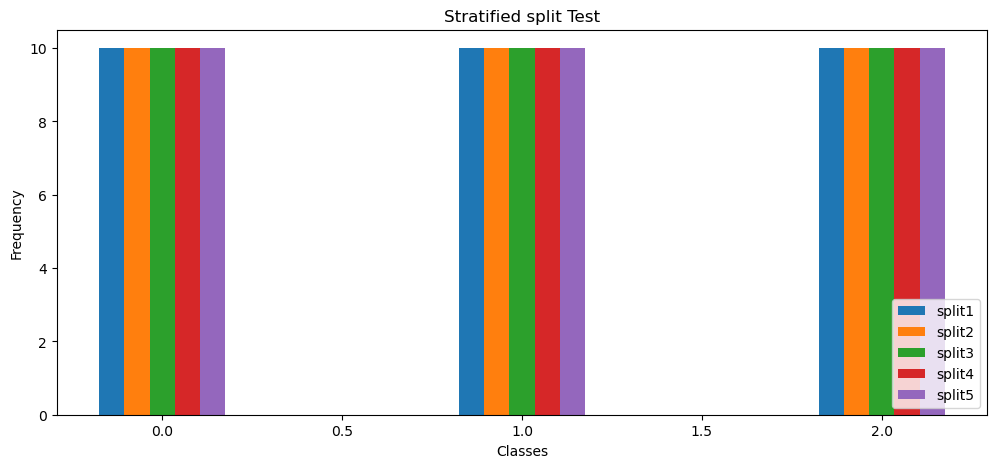

In [5]:
split_train = []
split_test = []
for train_index, test_index in stratified_split.split(data.data, data.target):    
    split_train.append([ v for _, v in sorted(Counter(list(data.target[train_index])).items())])
    split_test.append([ v for _, v in sorted(Counter(list(data.target[test_index])).items())])
    
plot_bars(split_train, [0,1,3], title='Stratified split Train')
plot_bars(split_test, [0,1,3], title='Stratified split Test')

### 3.3. Training and Testing the Model

#### 3.3.1. Classification Process

- Select the classification algorithm from [Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)
- Train on training data
- Predict labels on testing data
- Score prediction comparing predicted and reference labels

In [6]:
from sklearn.naive_bayes import GaussianNB

# choose classification algorithm & initialize it
clf = GaussianNB()

# for each training/testing fold
for train_index, test_index in stratified_split.split(data.data, data.target):
    # train (fit) model
    clf.fit(data.data[train_index], data.target[train_index])
    
    # predict test labels
    clf.predict(data.data[test_index])
    
    # score the model (using average accuracy for now)
    accuracy = clf.score(data.data[test_index], data.target[test_index])
    
    print("Accuracy: {:.3}".format(accuracy))



Accuracy: 0.867
Accuracy: 0.967
Accuracy: 0.967
Accuracy: 1.0
Accuracy: 1.0


#### 3.3.2. Baselines

Scikit-learn provides baselines via `DummyClassifier` class that takes `strategy` argument. The following baselines can be obtaing:

- random baseline: `uniform`
- chance baseline: `stratified`
- majority baseline: `most_frequent`


In [7]:
from sklearn.dummy import DummyClassifier

random_clf = DummyClassifier(strategy="uniform")

for train_index, test_index in stratified_split.split(data.data, data.target):
    random_clf.fit(data.data[train_index], data.target[train_index])
    random_clf.predict(data.data[test_index])
    accuracy = random_clf.score(data.data[test_index], data.target[test_index])
    
    print("Accuracy: {:.3}".format(accuracy))


Accuracy: 0.433
Accuracy: 0.433
Accuracy: 0.3
Accuracy: 0.267
Accuracy: 0.267


#### Exercise

Try `stratified` and `most_frequent` strategies and observe performances

In [8]:
# X = stratified or most_frequent

dummy_clf = DummyClassifier(strategy= "stratified")

for train_index, test_index in stratified_split.split(data.data, data.target):
    dummy_clf.fit(data.data[train_index], data.target[train_index])
    dummy_clf.predict(data.data[test_index])
    accuracy = dummy_clf.score(data.data[test_index], data.target[test_index])
    
    print("Accuracy: {:.3}".format(accuracy))

Accuracy: 0.3
Accuracy: 0.4
Accuracy: 0.467
Accuracy: 0.3
Accuracy: 0.4


In [9]:
# X = stratified or most_frequent

dummy_clf = DummyClassifier(strategy= "most_frequent")

for train_index, test_index in stratified_split.split(data.data, data.target):
    dummy_clf.fit(data.data[train_index], data.target[train_index])
    dummy_clf.predict(data.data[test_index])
    accuracy = dummy_clf.score(data.data[test_index], data.target[test_index])
    
    print("Accuracy: {:.3}".format(accuracy))

Accuracy: 0.333
Accuracy: 0.333
Accuracy: 0.333
Accuracy: 0.333
Accuracy: 0.333


#### 3.3.3. Better Classification Report

scikit-learn provides functions to report more informative performance values using [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# choose classification algorithm & initialize it
clf = GaussianNB()

# for each training/testing fold
for train_index, test_index in stratified_split.split(data.data, data.target):
    # train (fit) model
    clf.fit(data.data[train_index], data.target[train_index])
    # predict test labels
    hyps = clf.predict(data.data[test_index])
    refs = data.target[test_index]
    
    # each measure is computed 1 vs. all others
    report = classification_report(refs, hyps, target_names=data.target_names)
    
    print(report)
    

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy        

#### 3.3.4. Cross-Validation Evaluation

The cross-validation procedure and function of scikit-learn are described in [the documentation](https://scikit-learn.org/stable/modules/cross_validation.html).

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# choose classification algorithm & initialize it
clf = GaussianNB()
# get scores, all in one function
scores = cross_val_score(clf, data.data, data.target, cv=5)

print(scores)


[0.93333333 0.96666667 0.93333333 0.93333333 1.        ]


Cross-Validation using custom split and scoring.

The cross_validate function differs from cross_val_score in two ways:

- It allows specifying multiple metrics for evaluation.

- It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

# choose classification algorithm & initialize it
clf = GaussianNB()
# scoring providing our custom split & scoring using 
scores = cross_validate(clf, data.data, data.target, cv=stratified_split, scoring=['f1_macro'])

print(sum(scores['test_f1_macro'])/len(scores['test_f1_macro']))


0.9532497911445279


#### Exercise
- Read [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)
- Try different evaluation scores
    - For instance, change f1_macro with f1_micro or f1_weighted

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate


clf = GaussianNB()

scores = cross_validate(clf, data.data, data.target, cv=stratified_split, scoring=['f1_weighted'])

print(sum(scores['test_f1_weighted'])/len(scores['test_f1_weighted']))

0.9533166248955723


### 3.4. Vectorizing Text

> The raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

Consequently, the additional step that **text classification** requires is vectorization that converts text into a vector of numerical values. `scikit-learn` provides several vectorization methods in `sklearn.feature_extraction` [module](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). Most commonly used ones are:

- Count Vectorization
- TF-IDF Vectorization

Problem:
    - We need to covert the string e.g. 'Hello World' into a matrix in which the rows are the vectors that represent the words. The the word-vector dimensionality, i.e. the number of columns, depends on the encoding method.
   
Result: 
```
      [
 Hello [0, 1],
 World [1, 0],
      ]
```

#### 3.4.1. Bag-of-Words Representation

[Count Vectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) implements the following vectorization procedure. 

- *tokenizing* strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

- *counting* the occurrences of tokens in each document.

- *normalizing* and *weighting* with diminishing importance tokens that occur in the majority of samples / documents.

Each token is considered to be a __feature__ and the vector of all the token frequencies for a given document is considered a multivariate __sample__. Consequently, a corpus of documents is represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

> If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

The [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) implements both tokenization and occurrence counting in a single class, and it is possible to provide many parameters. 

It can take an external preprocessor or perform the following preprocessing steps (read documentation for details):

- __strip_accents__: remove accents and perform other character normalization during the preprocessing step.
- __lowercase__: convert all characters to lowercase before tokenizing.
- __stop_words__: apply a built-in stop word list for English is used. 
- __token_pattern__: regular expression denoting what constitutes a *token* for tokenization
- __ngram_range__: The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. (We will see ngrams the next lab)
- __max_df__: maximum frequency cut-off: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). 
- __min_df__: minimum frequency cut-off: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. 
- __vocabulary__: externally provided vocabulary
- __binary__: If True, all non zero counts are set to 1. This is useful for discrete probabilistic models that model binary events rather than integer counts.

#### 3.4.2. [TF-IDF Vectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)  
TF-IDF Vectorization = Count Vectorization + TF-IDF Transformation

> Transforms a count matrix to a normalized tf or tf-idf representation

> __Tf__ means term-frequency while __tf-idf__ means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

> The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to **scale down the impact of tokens that occur very frequently in a given corpus** and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

(Please refer to the documentation for the transformation formulas).

#### 3.4.3. Vectorization Example

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'who plays luke on star wars new hope',
    'show credits for the godfather',
    'who was the main actor in the exorcist',
    'find the female actress from the movie she \'s the man',
    'who played dory on finding nemo'
]

vectorizer = CountVectorizer()

# use fit_transform to 'learn' the features and vectorize the data
vectors = vectorizer.fit_transform(corpus)

print(vectors.toarray())  # print numpy vectors

# To print the labels of the columns
print(vectorizer.get_feature_names())
# or
#print(vectorizer.get_feature_names_out())

[[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1]
 [0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 2 0 1 1]
 [0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 3 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1]]
['actor', 'actress', 'credits', 'dory', 'exorcist', 'female', 'find', 'finding', 'for', 'from', 'godfather', 'hope', 'in', 'luke', 'main', 'man', 'movie', 'nemo', 'new', 'on', 'played', 'plays', 'she', 'show', 'star', 'the', 'wars', 'was', 'who']


C:\Users\xdieg\anaconda3\envs\pytorch_deeplearning\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
test_corpus = [
    'who was the female lead in resident evil',
    'who played guido in life is beautiful'
]

# 'trained' vectorizer can be later used to transform the test set 
test_vectors = vectorizer.transform(test_corpus)
print(test_vectors.toarray())

[[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]


## Lab Exercise: Text Classification

- Using Newsgroup dataset from `scikit-learn` train and evaluate Linear SVM (LinearSVC) model
- Experiment with different vectorization methods and parameters, experiment_id in parentheses (e.g. CounVector, CutOff, etc.):
    - `binary` of Count Vectorization (CountVect)
    - TF-IDF Transformation (TF-IDF)
    - Using TF-IDF
        - min and max cut-offs (CutOff)
        - wihtout stop-words (WithoutStopWords)
        - without lowercasing (NoLowercase)
 
To print the results:
print(experiment_id, the most appropriate score metric to report))

**Note**:
If the SVM doesn't converge play with the $C$ hyperparameter (starting from a low value).


In [16]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import random

In [17]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning) 

In [18]:
newsgroups = fetch_20newsgroups()

print(f"Samples: \t{len(newsgroups['data'])}")
print(f"Max doc len: \t{max([len(d) for d in newsgroups['data']])}")

Samples: 	11314
Max doc len: 	75154


In [19]:
newsgroups.target

array([7, 4, 4, ..., 3, 1, 8])

In [20]:
# A helper function to conduct experiments easily
def experiment(X, Y):
    
    split_strategy = KFold(n_splits=5, shuffle=True)
    
    dual_formulation = (X.shape[1] > X.shape[0])
    clf = LinearSVC(random_state=42, dual = dual_formulation, C = 3, max_iter = 5e3) # C: regularization penalty multiplier
    if dual_formulation: print("Using SVM in dual variables.")
    
    scores = []
    
    for train_index, test_index in tqdm(split_strategy.split(X, Y)):
        clf.fit(X[train_index], Y[train_index])
        
        y_pred = clf.predict(X[test_index])
        
        scores.append(f1_score(y_pred, Y[test_index], average="weighted"))
        
    report = classification_report(y_pred, Y[test_index])
    
    del split_strategy
    del clf 
    return sum(scores) / len(scores)

In [21]:
experiments = {}

**CountVectorizer (binary count)**

In [22]:
vectorizer = CountVectorizer(binary=True) # faster, not counting but just flagging
newsgroups_docs = vectorizer.fit_transform(newsgroups["data"]).toarray()

n_features = len(vectorizer.get_feature_names_out())
n_samples = newsgroups_docs.shape[0]

print(f"# features: \t{n_features}")
print(f"# samples: \t{n_samples}")

# features: 	130107
# samples: 	11314


In [23]:
score = experiment(newsgroups_docs, newsgroups.target)
del newsgroups_docs

Using SVM in dual variables.


5it [03:30, 42.01s/it]


In [24]:
experiments["CountVectorizer"] = score
print(f"experiment_{len(experiments.keys())}\t F1 weighted score: {score}")

experiment_1	 F1 weighted score: 0.8844153954751353


**TF-IDF Transformation**

In [25]:
n_exps = 10
cutoffs = [[
    random.randint(1, 10), 
    random.randint(500, 1500),
    random.choice([True, False]),
    random.choice(["english", None])
] for i in range(n_exps)]
cutoffs

[[1, 1169, True, None],
 [5, 1438, True, 'english'],
 [5, 699, True, 'english'],
 [10, 1409, False, None],
 [4, 793, False, 'english'],
 [5, 727, True, None],
 [9, 1262, True, 'english'],
 [1, 759, False, 'english'],
 [2, 1441, False, None],
 [3, 1008, False, None]]

In [26]:
for min_cutoff, max_cutoff, lowercase, stopwords in cutoffs:
    print(f"===== Min_cut: {min_cutoff}, Max_cut: {max_cutoff}, Lowercase: {lowercase}, Stop-words: {stopwords} =====")
    
    # Text pre-processing
    vectorizer = TfidfVectorizer(
        lowercase = lowercase,
        stop_words = stopwords,
        min_df = min_cutoff,
        max_df = max_cutoff
    )
    newsgroups_docs = vectorizer.fit_transform(newsgroups["data"]).toarray()

    n_features = len(vectorizer.get_feature_names_out())
    n_samples = newsgroups_docs.shape[0]

    print(f"# features: \t{n_features}")
    print(f"# samples: \t{n_samples}")

    score = experiment(newsgroups_docs, newsgroups.target)
    
    experiments[f"TFIDF_{min_cutoff}_{max_cutoff}"] = score
    print(f"experiment_{len(experiments.keys())}\t F1 weighted score: {score}\n\n")
    
    del newsgroups_docs

===== Min_cut: 1, Max_cut: 1169, Lowercase: True, Stop-words: None =====
# features: 	129927
# samples: 	11314
Using SVM in dual variables.


5it [01:39, 19.90s/it]


experiment_2	 F1 weighted score: 0.9243255065591418


===== Min_cut: 5, Max_cut: 1438, Lowercase: True, Stop-words: english =====
# features: 	25595
# samples: 	11314
Using SVM in dual variables.


5it [00:10,  2.13s/it]


experiment_3	 F1 weighted score: 0.9184699878521497


===== Min_cut: 5, Max_cut: 699, Lowercase: True, Stop-words: english =====
# features: 	25460
# samples: 	11314
Using SVM in dual variables.


5it [00:10,  2.06s/it]


experiment_4	 F1 weighted score: 0.9131653142388407


===== Min_cut: 10, Max_cut: 1409, Lowercase: False, Stop-words: None =====
# features: 	17931
# samples: 	11314
Using SVM in dual variables.


5it [00:08,  1.74s/it]


experiment_5	 F1 weighted score: 0.9094410180027843


===== Min_cut: 4, Max_cut: 793, Lowercase: False, Stop-words: english =====
# features: 	36875
# samples: 	11314
Using SVM in dual variables.


5it [00:14,  2.88s/it]


experiment_6	 F1 weighted score: 0.9185009620061615


===== Min_cut: 5, Max_cut: 727, Lowercase: True, Stop-words: None =====
# features: 	25620
# samples: 	11314
Using SVM in dual variables.


5it [00:10,  2.08s/it]


experiment_7	 F1 weighted score: 0.9109599446220031


===== Min_cut: 9, Max_cut: 1262, Lowercase: True, Stop-words: english =====
# features: 	16528
# samples: 	11314
Using SVM in dual variables.


5it [00:07,  1.47s/it]


experiment_8	 F1 weighted score: 0.9109785934570507


===== Min_cut: 1, Max_cut: 759, Lowercase: False, Stop-words: english =====
# features: 	154978
# samples: 	11314
Using SVM in dual variables.


5it [02:18, 27.70s/it]


experiment_9	 F1 weighted score: 0.9233545953021727


===== Min_cut: 2, Max_cut: 1441, Lowercase: False, Stop-words: None =====
# features: 	68810
# samples: 	11314
Using SVM in dual variables.


5it [00:23,  4.76s/it]


experiment_10	 F1 weighted score: 0.9219413987023957


===== Min_cut: 3, Max_cut: 1008, Lowercase: False, Stop-words: None =====
# features: 	47150
# samples: 	11314
Using SVM in dual variables.


5it [00:17,  3.46s/it]


experiment_11	 F1 weighted score: 0.9189567691705081




In [27]:
experiments

{'CountVectorizer': 0.8844153954751353,
 'TFIDF_1_1169': 0.9243255065591418,
 'TFIDF_5_1438': 0.9184699878521497,
 'TFIDF_5_699': 0.9131653142388407,
 'TFIDF_10_1409': 0.9094410180027843,
 'TFIDF_4_793': 0.9185009620061615,
 'TFIDF_5_727': 0.9109599446220031,
 'TFIDF_9_1262': 0.9109785934570507,
 'TFIDF_1_759': 0.9233545953021727,
 'TFIDF_2_1441': 0.9219413987023957,
 'TFIDF_3_1008': 0.9189567691705081}

In [28]:
import matplotlib.pyplot as plt

In [29]:
experiments.values()

dict_values([0.8844153954751353, 0.9243255065591418, 0.9184699878521497, 0.9131653142388407, 0.9094410180027843, 0.9185009620061615, 0.9109599446220031, 0.9109785934570507, 0.9233545953021727, 0.9219413987023957, 0.9189567691705081])

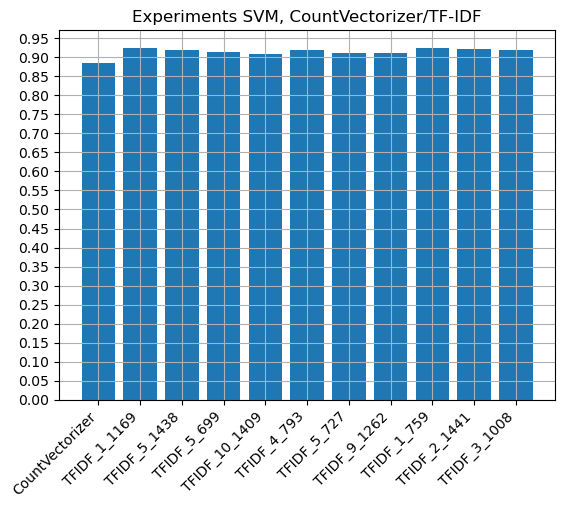

In [30]:
plt.title("Experiments SVM, CountVectorizer/TF-IDF")
plt.bar(experiments.keys(), experiments.values())
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 1, step=0.05))
plt.show()